# Student Performance Indicator

## Life Cycle of Machine Learning Project 

- Understand the Problem Statement 
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing 
- Model Training
- Choose best model

## Problem Statement 

- The project understands how the student's performance (Test Score) is affected by other variable such as Gender. Ethnicity, Parental level of education, lunch and test preparation course.

## Data Collection

- Data Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- Dataset consists of 8 features and 1000 observations.

## load packages and libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings 
warnings.filterwarnings("ignore")

In [19]:
# new packages needed for the project 


## Import dataset

In [134]:
dataset = pd.read_csv("StudentsPerformance.csv")

In [5]:
# View the dataset
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
# check the shape of the dataset
dataset.shape

(1000, 8)

In [16]:
# check for duplicate values
dataset.duplicated().sum()

0

In [18]:
# check info for the dataset
dataset.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 342.8 KB


In [17]:
# check for NaN values in the dataset
dataset.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [37]:
# features present in the dataset
dataset.columns

Index(['gender', 'race', 'parental_education', 'lunch', 'test_preparation',
       'math_score', 'reading_score', 'writing_score'],
      dtype='object')

In [135]:
# renaming the columns 
dataset.rename(columns = {'race/ethnicity':"race", 'parental level of education':"parental_education",
       'test preparation course':"test_preparation", 'math score':"math_score", 'reading score':"reading_score",
        'writing score':"writing_score"}, inplace = True)
dataset.columns

Index(['gender', 'race', 'parental_education', 'lunch', 'test_preparation',
       'math_score', 'reading_score', 'writing_score'],
      dtype='object')

In [22]:
# check the basic statistics of the dataset
dataset.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [27]:
# separate the categorical and numerical features in the dataset 
dataset_num = ['math_score', 'reading_score', 'writing_score']
dataset_cat = ['gender', 'race', 'parental_education', 'lunch', 'test_preparation']

In [29]:
# check whether proper number of levels and with correct levels for categorical 
for i in dataset.select_dtypes(include = "object"):
    print(i.upper(), " :- ", dataset[i].nunique())
    print(dataset[i].unique(),"\n")

GENDER  :-  2
['female' 'male'] 

RACE  :-  5
['group B' 'group C' 'group A' 'group D' 'group E'] 

PARENTAL_EDUCATION  :-  6
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

LUNCH  :-  2
['standard' 'free/reduced'] 

TEST_PREPARATION  :-  2
['none' 'completed'] 



## Data Checks to perform 

- Check for missing values
- Check for Duplicates
- Check data types
- Check for the number of unique values of each columns
- Check statistics of dataset
- Check various categories present in different categorical columns

### Check for missing values

In [32]:
print(dataset.isnull().sum())
print("\n",dataset.isna().sum())


gender                0
race                  0
parental_education    0
lunch                 0
test_preparation      0
math_score            0
reading_score         0
writing_score         0
dtype: int64

 gender                0
race                  0
parental_education    0
lunch                 0
test_preparation      0
math_score            0
reading_score         0
writing_score         0
dtype: int64


There is no missing values in the dataset

### Check for duplicate values

In [38]:
dataset.duplicated().sum()
# to remove duplicates
# datast.drop_duplicates(subset = *, inplace = True, ignore_index = Ture)

0

There is no duplicate present in dataset.

### Check Data Types

In [40]:
dataset.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              1000 non-null   object
 1   race                1000 non-null   object
 2   parental_education  1000 non-null   object
 3   lunch               1000 non-null   object
 4   test_preparation    1000 non-null   object
 5   math_score          1000 non-null   int64 
 6   reading_score       1000 non-null   int64 
 7   writing_score       1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 342.8 KB


### Check the number of unique values in each feature

In [44]:
dataset.nunique()

gender                 2
race                   5
parental_education     6
lunch                  2
test_preparation       2
math_score            81
reading_score         72
writing_score         77
dtype: int64

###  Check statistis of dataset

In [45]:
dataset.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### <ins>Observation<ins>
    
    - From the above description of numerical features, mean is similar to one another in these three numerical features.
    - Standard deviation is also close to each other in these three features.
    - Minimum score in maths in 0, whereas for others is in 10's range i.e 17 and 10 respectively.
    - Median for all the three features is somewhat closure to it's mean in the respective features. 
    - Maximum scores for the three features is 100.

### Exploratory Data Analysis

In [48]:
 dataset.head()

,gender,race,parental_education,lunch,test_preparation,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [63]:
for i in dataset.select_dtypes(include = "O"):
    print("Categories in {} varibale : {}".format(i, dataset[i].unique()),"\n")

Categories in gender varibale : ['female' 'male'] 

Categories in race varibale : ['group B' 'group C' 'group A' 'group D' 'group E'] 

Categories in parental_education varibale : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

Categories in lunch varibale : ['standard' 'free/reduced'] 

Categories in test_preparation varibale : ['none' 'completed'] 



In [68]:
for i in dataset.select_dtypes(include = "object"):
    print(i.upper(),":- ", dataset[i].nunique())
    print(dataset[i].unique(),"\n")

GENDER :-  2
['female' 'male'] 

RACE :-  5
['group B' 'group C' 'group A' 'group D' 'group E'] 

PARENTAL_EDUCATION :-  6
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

LUNCH :-  2
['standard' 'free/reduced'] 

TEST_PREPARATION :-  2
['none' 'completed'] 



In [83]:
# select the numerical and categorical features from the dataset
dataset_num = [feature for feature in dataset.columns if dataset[feature].dtype != "object"]
dataset_cat = [feature for feature in dataset.columns if dataset[feature].dtype == "object"]

print("We have {} numeric features : {}".format(len(dataset_num), dataset_num))
print("We have {} categorical features : {}".format(len(dataset_cat), dataset_cat))

We have 3 numeric features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features : ['gender', 'race', 'parental_education', 'lunch', 'test_preparation']


###  Adding columns for total score and average

In [136]:
# sum numerical features to get total score and average score
dataset["total_score"] = dataset["math_score"] + dataset["reading_score"] + dataset["writing_score"]
dataset["average"] = dataset["total_score"]/3

dataset.head()

,gender,race,parental_education,lunch,test_preparation,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


We will have to see how many students got maximum score in each exam

In [87]:
reading_full = dataset[dataset["reading_score"] == 100]["average"].count()
math_full = dataset[dataset["math_score"]==100]["average"].count()
writing_full = dataset[dataset["writing_score"]==100]["average"].count()

print(f"Number of students with full marks in math : {math_full}")
print(f"Number of students with full marks in reading : {reading_full}")
print(f"Number of students with full marks in writing : {writing_full}")

Number of students with full marks in math : 7
Number of students with full marks in reading : 17
Number of students with full marks in writing : 14


In [88]:
# number of students less than 20
math_less_20 = dataset[dataset["math_score"] <= 20]["average"].count()
reading_less_20 = dataset[dataset["reading_score"] <= 20]["average"].count()
writing_less_20 = dataset[dataset["writing_score"] <= 20]["average"].count()

print(f"Number of students scoring less than 20 in math : {math_less_20}")
print(f"Number of students scoring less than 20 in reading : {reading_less_20}")
print(f"Number of students scoring less than 20 in writing : {writing_less_20}")

Number of students scoring less than 20 in math : 4
Number of students scoring less than 20 in reading : 1
Number of students scoring less than 20 in writing : 3


### 4.1.1 Histograms and KDE

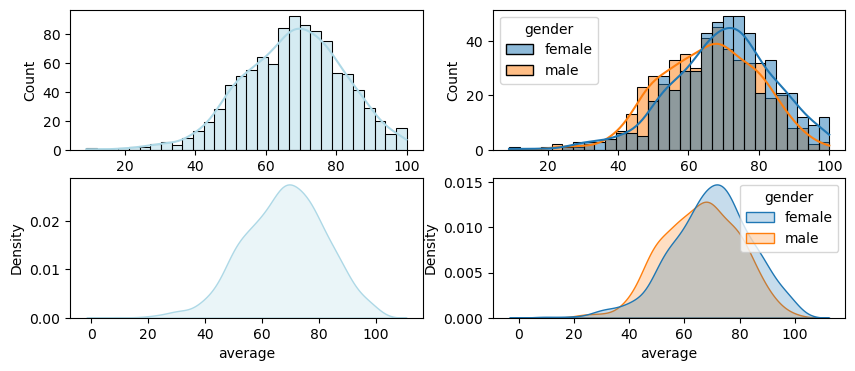

In [104]:

plt.figure(figsize = (10,4))
plt.subplot(2,2,1)
sns.histplot(x = "average",data = dataset, bins = 30, kde = True, color = "lightblue")

plt.subplot(2,2,2)
sns.histplot(x = "average", data = dataset, bins = 30, kde = True, hue = "gender")

plt.subplot(2,2,3)
sns.kdeplot(x = "average", data = dataset, color = "lightblue", fill = True)

plt.subplot(2,2,4)
sns.kdeplot(x = "average", data = dataset, hue = "gender", fill = True)

plt.show()

- Average follow a normal distribution
- Female students outperform male students 


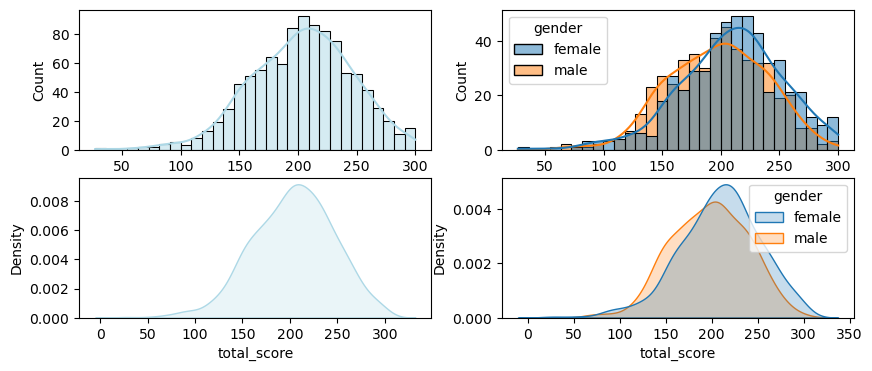

In [103]:
plt.figure(figsize = (10,4))
plt.subplot(2,2,1)
sns.histplot(x = "total_score",data = dataset, bins = 30, kde = True, color = "lightblue")

plt.subplot(2,2,2)
sns.histplot(x = "total_score", data = dataset, bins = 30, kde = True, hue = "gender")

plt.subplot(2,2,3)
sns.kdeplot(x = "total_score", data = dataset, color = "lightblue", fill = True)

plt.subplot(2,2,4)
sns.kdeplot(x = "total_score", data = dataset, hue = "gender", fill = True)

plt.show()

In [105]:
dataset_cat

['gender', 'race', 'parental_education', 'lunch', 'test_preparation']

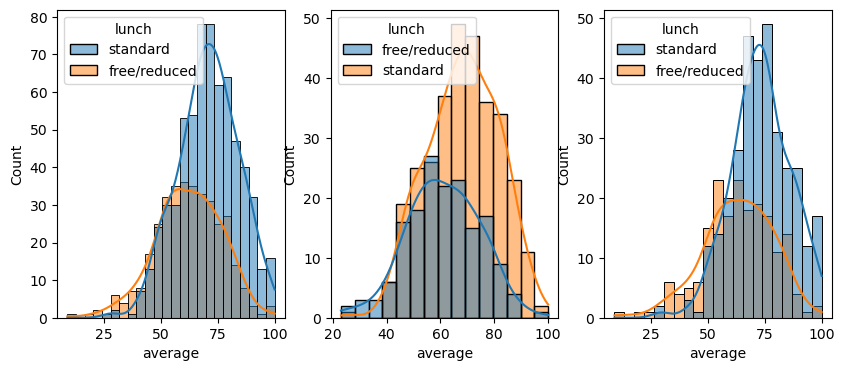

In [111]:
plt.figure(figsize = (10,4))
plt.subplot(1,3,1)
sns.histplot(x = "average", data = dataset,hue = "lunch", kde = True)

plt.subplot(1,3,2)
sns.histplot(x = "average", data = dataset[dataset['gender']=="male"],hue = "lunch", kde = True)

plt.subplot(1,3,3)
sns.histplot(x = "average", data = dataset[dataset["gender"]=="female"],hue = "lunch", kde = True)
plt.show()

- Standard lunch helps to perform well in exam
- Standard lunch helps to perform well in exam be it for male or female.

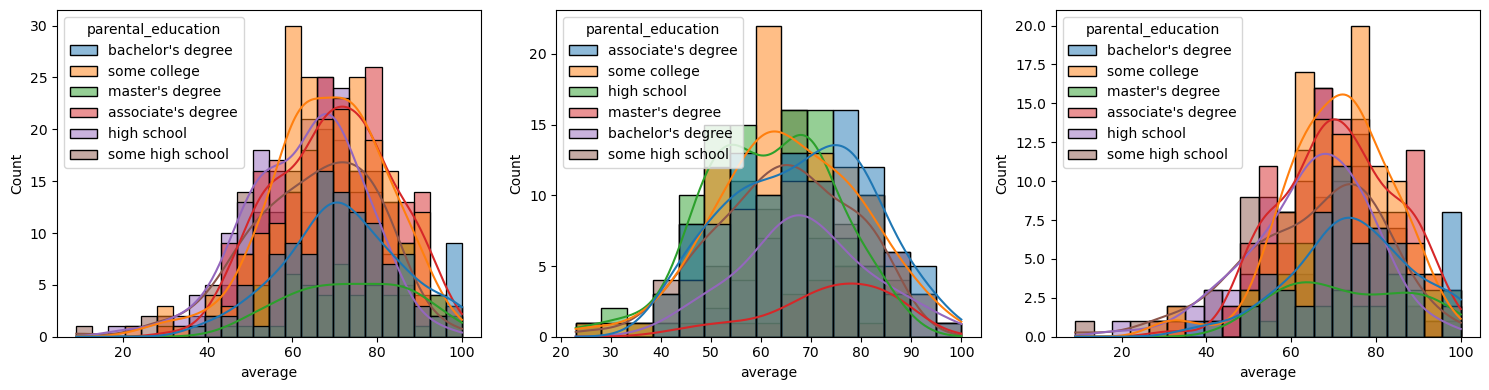

In [117]:
# parents level of education
variable = "parental_education"

plt.figure(figsize = (15,4))

# Plot 1: hist plot for average vs parents_education
plt.subplot(1,3,1)
sns.histplot(x = "average", data = dataset, hue = variable, kde = True)

# Plot 2: hist plot for male's average vs parents_education
plt.subplot(1,3,2)
sns.histplot(x = "average", data = dataset[dataset['gender']== "male"], hue = "parental_education",kde = True)

# Plot 3: hist plot for female's average vs parents_education
plt.subplot(1,3,3)
sns.histplot(x = "average", data = dataset[dataset['gender']== "female"], hue = "parental_education", kde = True)

# Adjust layout
plt.tight_layout()

plt.show()

- First plot shows that parental level of education doesn't have much impact overall.
- Second plot shows that parents with Associate degree or some college helps male to perform well.
- Third plot shows that parents education doesn't have any impact on female's performance. 

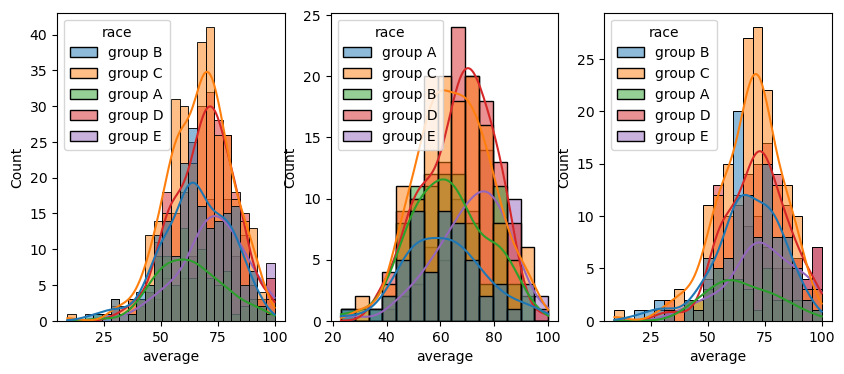

In [119]:
# race 

plt.figure(figsize = (10,4))

# Plot 1: average vs race
plt.subplot(1,3,1)
sns.histplot(x = "average", data = dataset, hue = "race", kde = True)

# plot 2 : male's average vs race
plt.subplot(1,3,2)
sns.histplot(x = "average", data = dataset[dataset["gender"]=="male"], hue = "race", kde = True)

# plot 3: female's average vs race
plt.subplot(1,3,3)
sns.histplot(x = "average", data = dataset[dataset["gender"]=="female"] , hue = "race", kde = True)

plt.show()

- Group C and D perform well overall
- Group C and D male perform well 
- Group C female perform well

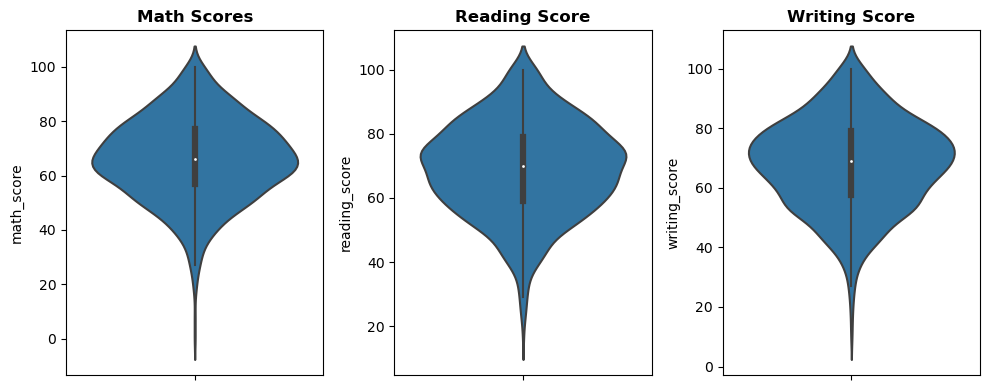

In [130]:
plt.figure(figsize = (10,4))

# Maths score
plt.subplot(1,3,1)
sns.violinplot(y = "math_score", data = dataset)
plt.title("Math Scores", fontweight = "bold")

# Reading score
plt.subplot(1,3,2)
sns.violinplot(y = "reading_score", data = dataset)
plt.title("Reading Score", fontweight = "bold")

# Writing score
plt.subplot(1,3,3)
sns.violinplot(y = 'writing_score', data = dataset)
plt.title("Writing Score", fontweight = "bold")

# Adjust layout
plt.tight_layout()

# show plot
plt.show()

- Most of the students have scored marks between 50- 80 in maths 
- Similar in Reading and writing 

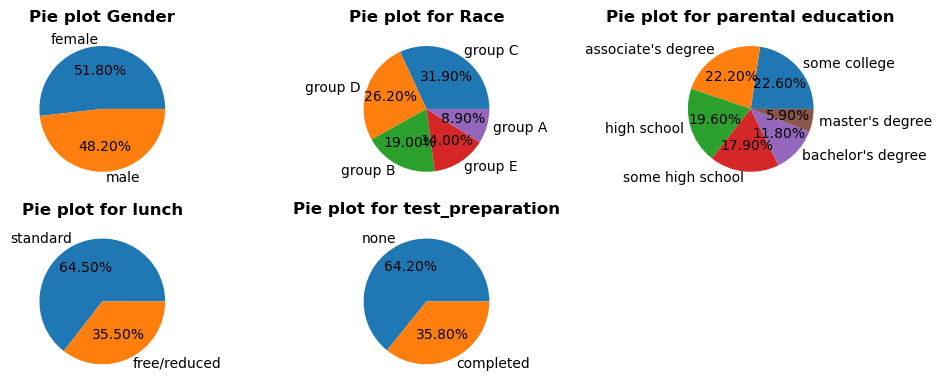

In [11]:
# All the categorical features using pie plot

plt.figure(figsize = (10,4))

# plot 1:gender
plt.subplot(2,3,1)
value_count = dataset["gender"].value_counts()
plt.pie(x = value_count, labels = value_count.index, autopct = "%0.2f%%")
plt.axis('off')
plt.title("Pie plot Gender", fontweight = "bold")

# plot 2 : race
plt.subplot(2,3,2)
value_count = dataset["race"].value_counts()
plt.pie(x = value_count, labels = value_count.index, autopct = "%0.2f%%")
plt.axis('off')
plt.title("Pie plot for Race", fontweight = "bold")

# plot 3 : parental_Education
plt.subplot(2,3,3)
value_count = dataset["parental_education"].value_counts()
plt.pie(x = value_count, labels = value_count.index, autopct = "%0.2f%%")
plt.axis('off')
plt.title("Pie plot for parental education", fontweight = "bold")

# plot 4: lunch 
plt.subplot(2,3,4)
value_count = dataset["lunch"].value_counts()
plt.pie(x = value_count, labels = value_count.index, autopct = "%0.2f%%")
plt.axis('off')
plt.title("Pie plot for lunch", fontweight = "bold")

# plot 5 : test_preparation
plt.subplot(2,3,5)
value_count = dataset["test_preparation"].value_counts()
plt.pie(x = value_count, labels = value_count.index, autopct = "%0.2f%%")
plt.axis('off')
plt.title("Pie plot for test_preparation", fontweight= "bold")

# adjust layout
plt.tight_layout()

plt.show()

- Number of male and female students are almost equal
- Group C students are highest 
- Most of the parents have associate degree
- Standard lunch is the most preffered meal 
- Most of the students don't have complete test preparation

[]

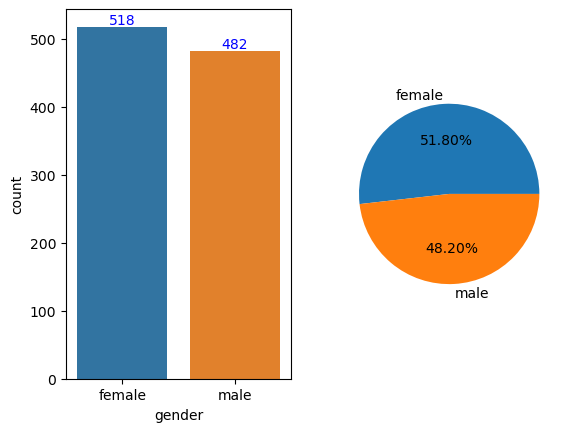

In [20]:
# check gender column distribution 
plt.subplot(1,2,1)
ax = sns.countplot(x = "gender", data = dataset)
# ax.bar_label(ax.containers[0])
for i in ax.containers:
    ax.bar_label(i, color = "blue", )
    
plt.subplot(1,2,2)
# value = dataset["gender"].value_counts()
plt.pie(x = dataset.gender.value_counts(), labels = dataset.gender.value_counts().index, autopct = "%0.2f%%")
plt.plot()

Gender has balanced data with female being 518 and male being 482.

In [28]:
# Does gender has any impact on students performace 
group_gender = dataset.groupby("gender").mean()
group_gender

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


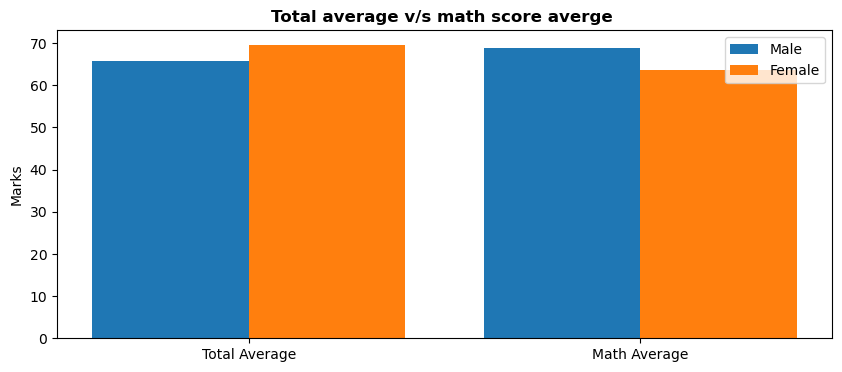

In [41]:
plt.figure(figsize = (10,4))

x = ["Total Average", "Math Average"]

female_scores = [group_gender["average"][0], group_gender["math_score"][0]]
male_scores = [group_gender["average"][1], group_gender["math_score"][1]]

X_axis = np.arange(len(x))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = "Male")
plt.bar(X_axis + 0.2, female_scores, 0.4, label = "Female")

plt.xticks(X_axis,x)
plt.ylabel("Marks")
plt.title("Total average v/s math score averge ", fontweight = "bold")
plt.legend()
plt.show()

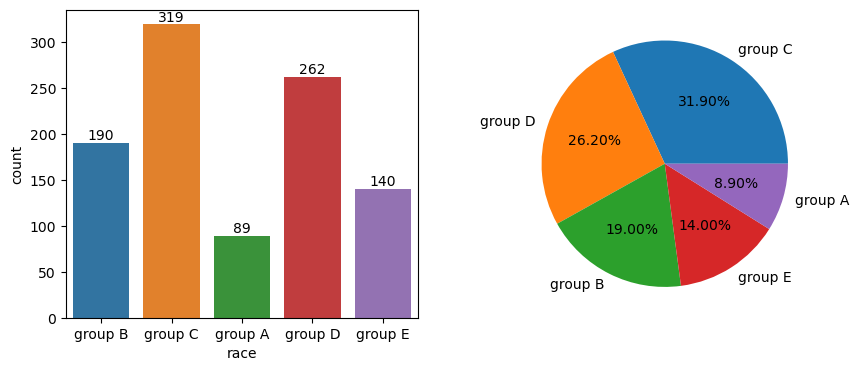

In [58]:
# Race 
variable = "race"
fig, axs = plt.subplots(1,2,figsize = (10,4))

# Count Plot
sns.countplot(x = variable, data = dataset, ax = axs[0])
for i in axs[0].containers:
    axs[0].bar_label(i)
    
# Pie plot
value = dataset[variable].value_counts()
axs[0] = plt.pie(x = value, labels = value.index, autopct = "%0.2f%%")

# Show plot
plt.show()


- most of the students are from Group C and D
- Least number of students are from Group A

In [59]:
group_race = dataset.groupby("race").mean()
group_race

,math_score,reading_score,writing_score,total_score,average
race,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


### Check for outliers in the dataset

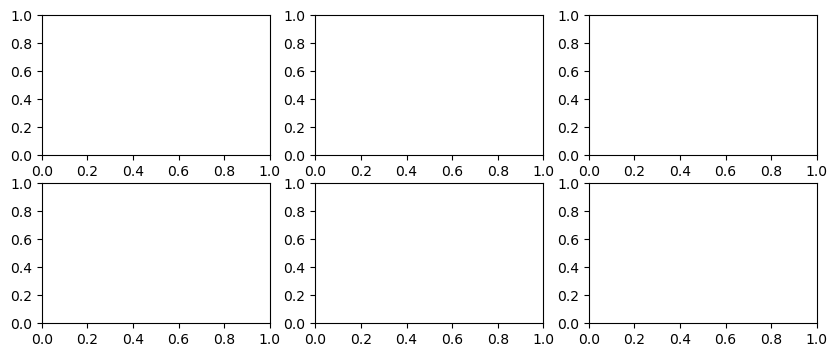

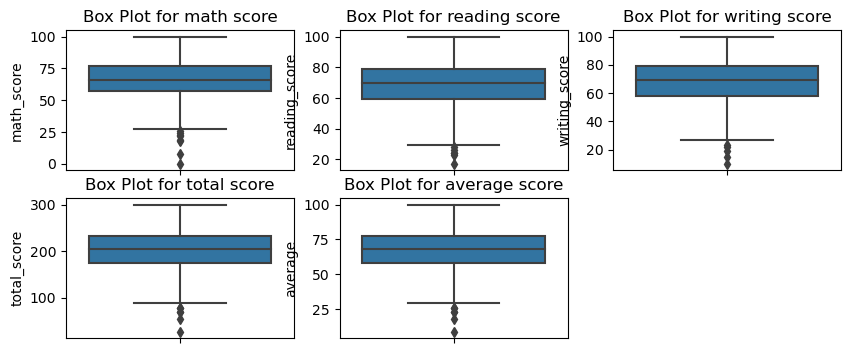

In [99]:
plt.figure(figsize = (10,4))

plt.subplot(2,3,1)
sns.boxplot(y = "math_score", data = dataset)
plt.title("Box Plot for math score")

plt.subplot(2,3,2)
sns.boxplot(y = "reading_score", data = dataset)
plt.title("Box Plot for reading score")

plt.subplot(2,3,3)
sns.boxplot(y = "writing_score", data = dataset)
plt.title("Box Plot for writing score")

plt.subplot(2,3,4)
sns.boxplot(y = "total_score", data = dataset)
plt.title("Box Plot for total score")

plt.subplot(2,3,5)
sns.boxplot(y = "average", data = dataset)
plt.title("Box Plot for average score")

plt.show()

In [178]:
# Removing the outliers from the dataset 

q1 = dataset["math_score"].quantile(0.25)
q3 = dataset["math_score"].quantile(0.75)
iqr = q3-q1

upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr


print(q1, q3,iqr, upper_limit, lower_limit)

x = dataset[(dataset["math_score"]> upper_limit) | (dataset["math_score"]<lower_limit)].index.to_list()

temp = dataset.drop(x, axis = 0)

print(x)

print(type(x))

57.0 77.0 20.0 107.0 27.0
[17, 59, 145, 338, 466, 787, 842, 980]
<class 'list'>


In [185]:
x = []
y = []
for i in dataset.select_dtypes(exclude = "object"):
    print(i)
    q1 = dataset[i].quantile(0.25)
    q3 = dataset[i].quantile(0.75)
    upper_limit = q3 + 1.5*(q3-q1)
    lower_limit = q1 - 1.5*(q3-q1)
#     x.extend(dataset[(dataset[i]>upper_limit)|(dataset[i]<lower_limit)].index.to_list())
#     x = list(set(x))
    x = dataset[(dataset[i]>upper_limit)|(dataset[i]<lower_limit)].index)]
    temp = dataset.drop(axis = )
    
print(x)

math_score
[842, 17, 145, 338, 466, 787, 980, 59]
reading_score
[327, 842, 76, 17, 145, 338, 466, 787, 980, 211, 596, 59]
writing_score
[327, 842, 76, 17, 145, 338, 466, 787, 980, 211, 596, 59]
total_score
[327, 842, 76, 17, 145, 338, 466, 787, 980, 211, 596, 59]
average
[327, 842, 76, 17, 145, 338, 466, 787, 980, 211, 596, 59]
[327, 842, 76, 17, 145, 338, 466, 787, 980, 211, 596, 59]


In [186]:
temp = dataset.drop(labels = x, axis = 0)



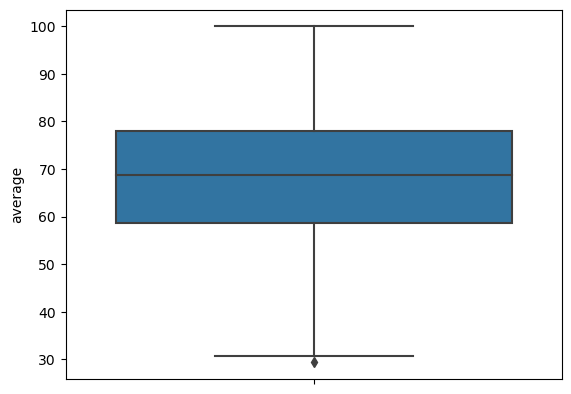

In [190]:
sns.boxplot(y = "average", data = temp)
plt.show()